In [2]:
#Importamos librerias
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Libreria de arbol de decisiones

In [3]:
# Cargar el conjunto de datos en un DataFrame
df = pd.read_csv('/content/drive/MyDrive/Practica Diplomado/Entrenamiento de modelos/StressLevelDataset.csv')
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [4]:
#Miramos la cantidad de estudiantes según el rango de estrés
estresEst = df['stress_level'].value_counts()
print("Estudiantes según el rango de estrés:\n",estresEst)

Estudiantes según el rango de estrés:
 stress_level
0    373
2    369
1    358
Name: count, dtype: int64


In [5]:
#Creamos nuestro vector de variables independientes (caracteristicas)
x = df.drop(['stress_level'],axis = 1)
print("Caracteristicas originales:\n",x)

Caracteristicas originales:
       anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

In [6]:
#Creamos nuestro vector de etiquetas(stress_level)
y = df.stress_level
y

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64

In [7]:
#Creamos nuestros sets de entrenamiento
from sklearn.model_selection import train_test_split #Importamos librerias
x_entre, x_test, y_entre, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)
#En este caso vamos a utilizar el 30% de testeo y el 70% para entreno

In [8]:
#Mostramos en pantalla nuestros sets de entrenamiento y testeo
print("Cantidad de datos para Tren de entreno: ", x_entre.shape, y_entre.shape)
print("Cantidad de datos para Tren de testeo: ", x_test.shape, y_test.shape)

Cantidad de datos para Tren de entreno:  (770, 20) (770,)
Cantidad de datos para Tren de testeo:  (330, 20) (330,)


In [9]:
#Empezamos a modelar nuestro arbol de desiciones con un criterio llamado entropia este
#nos entregará la ganancia de información que nos ayudará a mirar si construimos bien nuestro arbol
arbol = DecisionTreeClassifier(criterion="entropy",max_depth=2) #número de nodos en el arbol
#declaramos un crterio entropia y que tenga un maximo de ramificaciones o nodos

In [10]:
#Ahora ajustamos nuestro modelo usando los datos de entrenamiento
arbol.fit(x_entre,y_entre)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [11]:
#Empezamos a hacer la predicción y la guardamos en arbolpred
arbolpred = arbol.predict(x_test) #utilizamos valores de testeo

In [12]:
#Comparamos los valores reales con los predichos por el modelo
print("Predicción del modelo: ", arbolpred [0:20])
print("Valores reales:\n", y_test[0:20])

Predicción del modelo:  [0 1 2 0 1 2 2 1 0 0 2 2 2 1 2 1 0 2 2 1]
Valores reales:
 332     0
309     1
1026    1
964     0
977     1
430     2
320     0
531     1
20      0
159     0
828     2
751     0
342     2
81      1
534     0
850     1
559     0
236     2
792     2
350     1
Name: stress_level, dtype: int64


In [13]:
#Evaluamos nuestro modelo y observamos la predicción
from sklearn import metrics
print("Presición del Arbol de decisiones: ", metrics.accuracy_score(y_test, arbolpred))

Presición del Arbol de decisiones:  0.9


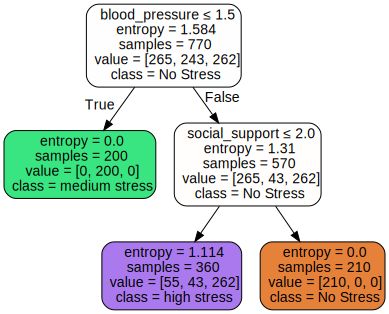

In [14]:
import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                         feature_names=x_entre.columns.values,
                         class_names=['No Stress','medium stress','high stress'],
                         filled=True, rounded=True,
                         special_characters=True,leaves_parallel = False)
graph = graphviz.Source(dot_data)
graph

[Text(0.5, 1.0, 'Matriz de Confusión'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

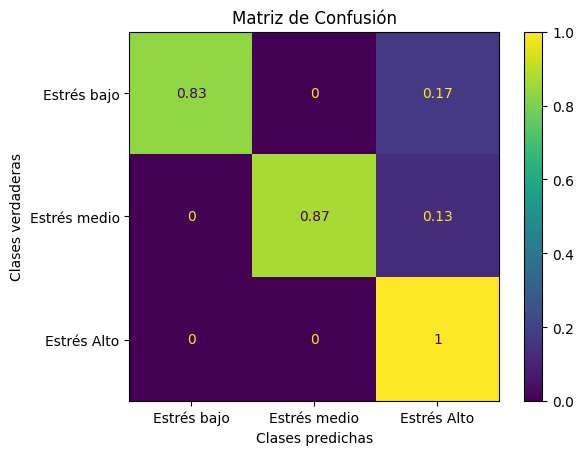

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = arbol.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['Estrés bajo','Estrés medio','Estrés Alto'])
cm_display.plot()
cm_display.ax_.set(title='Matriz de Confusión', xlabel='Clases predichas', ylabel='Clases verdaderas')

In [16]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall)) ##La que mejor resultado da en este caso
print('F1score: {}'.format(fscore))
print('Support: {}'.format(support))


Precision: [1.         1.         0.76428571]
Recall: [0.83333333 0.86956522 1.        ]
F1score: [0.90909091 0.93023256 0.86639676]
Support: [108 115 107]


[Text(0.5, 1.0, 'Matriz de Confusión'),
 Text(0.5, 0, 'Clases predichas'),
 Text(0, 0.5, 'Clases verdaderas')]

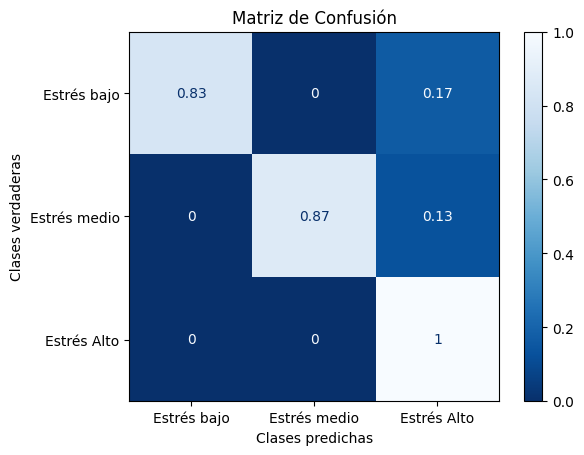

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = arbol.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['Estrés bajo','Estrés medio','Estrés Alto'])
cm_display.plot(cmap='Blues_r')  # Cambia 'viridis' por el mapa de colores que desees  ###seleccionado 'winter'
cm_display.ax_.set(title='Matriz de Confusión', xlabel='Clases predichas', ylabel='Clases verdaderas')



In [21]:
import matplotlib.pyplot as plt
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [22]:
import seaborn as sns

<Axes: xlabel='blood_pressure', ylabel='Count'>

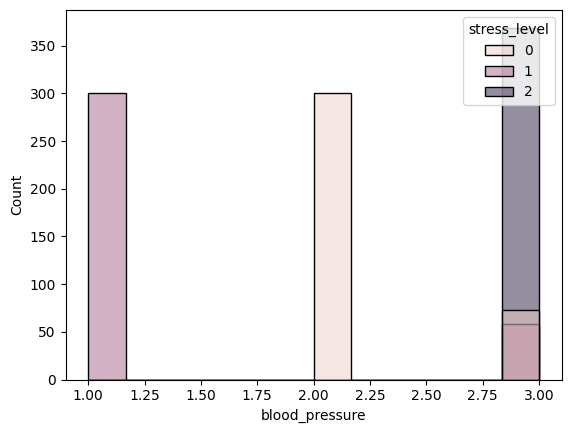

In [24]:
sns.histplot(x=df.blood_pressure, hue=df.stress_level)
#Set the labels for the x and y axes
plt.xlabel("blood_pressure")
plt.ylabel("Frequency")

# Add a title to the plot
plt.title("Histogram of Data")

# Display the plot
plt.show()

In [27]:
import pickle

In [28]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(y_pred, file)